# This is our notebook

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk, load_MLCup
from src.MetricFunctions import get_metric_instance
from src.model import MLP
from src.Optimizers2 import HBG

In [ ]:
path = os.getcwd()
file_train = '/data/ML-CUP22-TR.csv'
file_test = '/data/ML-CUP22-TS.csv'

labels_train = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']
labels_test = ['x1','x2','x3','x4','x5','x6','x7','x8','x9']

X_train, y_train = load_MLCup(path + file_train, labels_train)
X_test = load_MLCup(path + file_test, labels_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

Epoch 1 - Objective function: 447.80764435103464 - Loss: 447.8075295000699 - Gradient norm: 70.6049604133016
Epoch 2 - Objective function: 447.30928869274186 - Loss: 447.30917385787944 - Gradient norm: 70.56253001493054
Epoch 3 - Objective function: 446.36353490471737 - Loss: 446.3634198721973 - Gradient norm: 70.48320241392
Epoch 4 - Objective function: 445.0171307133112 - Loss: 445.01701488202644 - Gradient norm: 70.37300328038184
Epoch 5 - Objective function: 443.3128012259421 - Loss: 443.31268350789674 - Gradient norm: 70.23817505221308
Epoch 6 - Objective function: 441.2894396186641 - Loss: 441.28931838324564 - Gradient norm: 70.08496143622567
Epoch 7 - Objective function: 438.98230268376057 - Loss: 438.9821757346246 - Gradient norm: 69.91944204072408
Epoch 8 - Objective function: 436.42321120129714 - Loss: 436.42307577701786 - Gradient norm: 69.74740833752536
Epoch 9 - Objective function: 433.64075415797225 - Loss: 433.6406069495083 - Gradient norm: 69.57427342242548
Epoch 10 - O

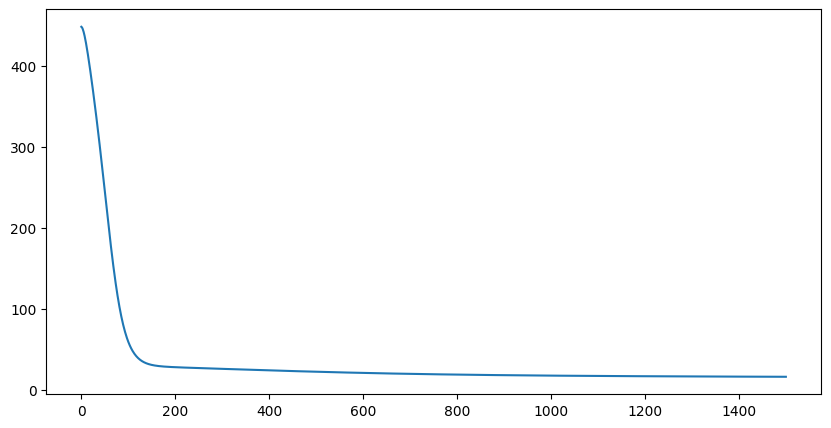

In [16]:
alpha_l2 = 0.001
loss = 'MSE'
regularization = 'l2'
stopping_criterion = 'max_epochs'
max_epochs = 1500
verbose = True

mlp = MLP([40, 20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = HBG(mlp, loss, regularization, stopping_criterion)

mlp.initialize()
optimizer.initialize(alpha = 1e-4, beta = 0.9, stopping_value = max_epochs, alpha_l2 = alpha_l2, verbose = verbose)
optimizer.fit_model(X_train, y_train)

fig, ax = plt.subplots(1,1, figsize = (10,5))

ax.plot(optimizer.obj_history, label = 'HBG objective function')